In [1]:
"""
Tried doing this thing where I put all the imports in the beginning but seems it's harder to keep track after a while.
Will go back to putting all the imports directly in the respective portions and double up as necessary.
If possible, could you comment on whether there's a preference from employers or in jobs? 
"""

import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import numpy as np

# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [2]:
def matrix_multiply(A, B):
    res = []
    for i in range(0,len(A)):
        temp=[]
        for j in range(0,len(B[0])):
            s = 0
            for k in range(0,len(A[0])):
                s += A[i][k]*B[k][j]
            temp.append(s)
        res.append(temp)

    return res

A = [[1,2,3], [4,5,6]]
B = [[1,2,3], [4,5,6], [7,8,9]]

a = np.array([ [1,2,3] ])
b = np.array([ [1], [4], [7] ])

print(matrix_multiply(A,B))
print(matrix_multiply(a,b))

[[30, 36, 42], [66, 81, 96]]
[[30]]


# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$x 	+ 	y 	+ 	z 	= 	6$

$2y 	+ 	5z 	= 	−4$

$2x 	+ 	5y 	− 	z 	= 	27$

In [3]:
#2.1
A = [[2, 3], [2, 3]]
B = [[2, 3], [4, 6]]
C = [[2, 3], [-8, -12]]

In [4]:
#2.2
exp = [[1,2,3], [4,5,6]]
idt = [[1,0,0,0],[0,1,0,0],[0,0,1,0]]

print(matrix_multiply(exp, np.eye(3)))
print(matrix_multiply(exp, idt))
"""The identity matrix is a perfect square to allow for a dot product with any matrix to return the matrix as per above"""

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
[[1, 2, 3, 0], [4, 5, 6, 0]]


'The identity matrix is a perfect square to allow for a dot product with any matrix to return the matrix as per above'

In [5]:
#2.3
A = np.array([[2,0,0], [0,4,0], [0,0,6]])
B = np.array([[2,3,5], [1,4,6], [7,8,6]])
C = np.array([[1,3,5], [2,6,6], [2,6,3]])
print(A)
print(B)
print(C)
print("\nThe following have consistent trace:")
print("TR(CBA):",np.trace(np.dot(C,B).dot(A)))
print("TR(ACB):",np.trace(np.dot(A,C).dot(B)))
print("TR(BAC):",np.trace(np.dot(B,A).dot(C)))
print("\nThe following results have different trace:")
print("TR(BCA):",np.trace(np.dot(B,C).dot(A)))
print("TR(CAB):",np.trace(np.dot(C,A).dot(B)))
print("TR(ABC):",np.trace(np.dot(A,B).dot(C)))

[[2 0 0]
 [0 4 0]
 [0 0 6]]
[[2 3 5]
 [1 4 6]
 [7 8 6]]
[[1 3 5]
 [2 6 6]
 [2 6 3]]

The following have consistent trace:
TR(CBA): 776
TR(ACB): 776
TR(BAC): 776

The following results have different trace:
TR(BCA): 894
TR(CAB): 894
TR(ABC): 894


In [6]:
#2.4
np.eye(4) ### non-zero but I think this is considered a cheat-y answer?

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [7]:
#2.5
quad = np.array([
    [1,1,1],
    [0,2,5],
    [2,5,-1]
])

res = [6,-4,27]

np.linalg.inv(quad).dot(res)

array([ 5.,  3., -2.])

# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [8]:
from sklearn.datasets import load_boston
df = pd.DataFrame(data=load_boston()['data'], columns=load_boston()['feature_names'])
df['MEDV'] = load_boston()['target']

In [9]:
import statsmodels.api as sm

x = sm.add_constant(df)
y = df['MEDV']

est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.461e+30
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:30:16   Log-Likelihood:                 15277.
No. Observations:                 506   AIC:                        -3.052e+04
Df Residuals:                     491   BIC:                        -3.046e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.973e-14   2.15e-14     -2.784      0.006   -1.02e-13   -1.76e-14
CRIM        9.606e-17   1.33e-16      0.722      0.470   -1.65e-16    3.57e-16
ZN           1.11e-16   5.56e-17      1.998      0.046    1.84e-18     2.2e-16
INDUS       6.462e-17   2.46e-16      0.263      0.793   -4.19e-16    5.48e-16
CHAS        3.011e-15   3.48e-15      0.865      0.388   -3.83e-15    9.85e-15
NOX         2.298e-14   1.56e-14      1.471      0.142   -7.71e-15    5.37e-14
RM           3.15e-15   1.81e-15      1.742      0.082   -4.03e-16     6.7e-15
AGE         2.429e-17   5.29e-17      0.459      0.646   -7.96e-17    1.28e-16
DIS        -3.331e-16   8.41e-16     -0.396      0.692   -1.99e-15    1.32e-15
RAD         2.533e-16   2.71e-16      0.934      0.351    -2.8e-16    7.86e-16
TAX         1.442e-17   1.52e-17      0.948      0.344   -1.55e-17    4.43e-17
PTRATIO    -6.523e-16   5.51e-16     -1.184      0.237   -1.73e-15     4.3e-16
B           1.946e-16   1.09e-17     17.889      0.000    1.73e-16    2.16e-16
LSTAT      -9.992e-16   2.24e-16     -4.462      0.000   -1.44e-15   -5.59e-16
MEDV           1.0000    1.8e-16   5.54e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      217.216   Durbin-Watson:                   0.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              779.205
Skew:                           2.026   Prob(JB):                    6.28e-170
Kurtosis:                       7.533   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `3.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [10]:
x = sm.add_constant(df)
y = df['MEDV']

y = np.sqrt(np.abs(y))

est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3347.
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:30:16   Log-Likelihood:                 471.77
No. Observations:                 506   AIC:                            -913.5
Df Residuals:                     491   BIC:                            -850.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2469      0.109     29.720      0.000       3.032       3.462
CRIM          -0.0066      0.001     -9.821      0.000      -0.008      -0.005
ZN            -0.0005      0.000     -1.786      0.075      -0.001    5.05e-05
INDUS          0.0017      0.001      1.334      0.183      -0.001       0.004
CHAS           0.0063      0.018      0.354      0.724      -0.029       0.041
NOX           -0.1893      0.080     -2.381      0.018      -0.346      -0.033
RM            -0.0477      0.009     -5.176      0.000      -0.066      -0.030
AGE         6.468e-05      0.000      0.240      0.810      -0.000       0.001
DIS            0.0019      0.004      0.438      0.662      -0.007       0.010
RAD            0.0039      0.001      2.843      0.005       0.001       0.007
TAX           -0.0002   7.75e-05     -2.834      0.005      -0.000   -6.73e-05
PTRATIO       -0.0061      0.003     -2.167      0.031      -0.012      -0.001
B              0.0001   5.54e-05      2.109      0.035    7.96e-06       0.000
LSTAT         -0.0118      0.001    -10.372      0.000      -0.014      -0.010
MEDV           0.0924      0.001    100.626      0.000       0.091       0.094
==============================================================================
Omnibus:                      102.640   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.250
Skew:                          -0.913   Prob(JB):                     3.94e-76
Kurtosis:                       6.625   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

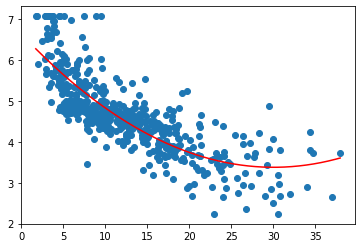

In [13]:
x = np.asarray(df['LSTAT'])
x = sm.add_constant(x)
x = np.concatenate([x, np.square(x[:,1])[:, np.newaxis]], axis=1)

est = sm.OLS(y, x).fit()
xfit = sm.add_constant(np.linspace(min(x[:,1]), max(x[:,1]), 1000))
xfit = np.concatenate([xfit, np.square(xfit[:,1])[:, np.newaxis]], axis=1)
yfit = est.predict(xfit[:, np.newaxis])
fig, ax = plt.subplots()
ax.scatter(x[:,1], y)
ax.plot(xfit[:,1], yfit, color="red")
plt.show()

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **3.3** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

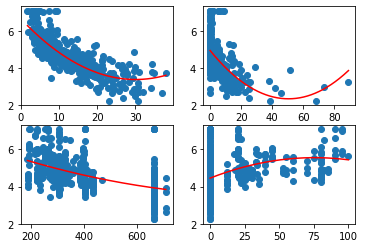

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)


def reg_plot_on_ax(feature, ax):
    x = feature
    x = sm.add_constant(x)
    x = np.concatenate([x, np.square(x[:,1])[:, np.newaxis]], axis=1)
    y = np.sqrt(np.abs(df['MEDV']))

    est = sm.OLS(y, x).fit()
    xfit = sm.add_constant(np.linspace(min(x[:,1]), max(x[:,1]), 1000))
    xfit = np.concatenate([xfit, np.square(xfit[:,1])[:, np.newaxis]], axis=1)
    yfit = est.predict(xfit[:, np.newaxis])
    ax.scatter(x[:,1], y)
    ax.plot(xfit[:,1], yfit, color="red")
    
feature_1 = np.asarray(df['LSTAT'])
feature_2 = np.asarray(df['CRIM'])
feature_3 = np.asarray(df['TAX'])
feature_4 = np.asarray(df['ZN'])

reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)